# K - Means Clustering 

* *K-Means Clustering is an Unsupervised Machine Learning algorithm which groups the unlabeled dataset into different clusters. The article aims to explore the fundamentals and working of k means clustering along with its implementation.*

* ***How k-means clustering works?***

*We are given a data set of items with certain features and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm. ‘K’ in the name of the algorithm represents the number of groups/clusters we want to classify our items into.*

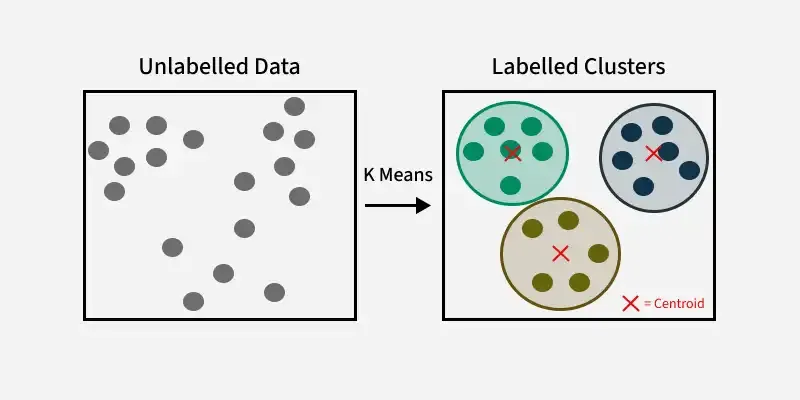

In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans

In [2]:
X = np.array([[5,3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

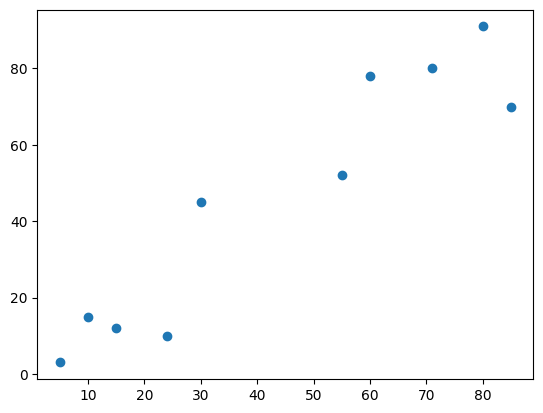

In [3]:
plt.scatter(X[:,0],X[:,1], label='True Position') 

## K - Means Clustering With 2 Clusters

* *K-Means is an unsupervised machine learning algorithm used to group data into clusters based on similarity. Here's how it works step by step for 2 clusters:*

**1. Initialization:**
  * *Randomly initialize two cluster centroids (points representing the center of a cluster).*
  * *These centroids will move iteratively to better represent the clusters.*

**2. Assignment Step:**
  * *For every data point in the dataset, calculate the distance to each centroid.*
  * *Assign the data point to the cluster whose centroid is closer.*

**3. Update Step:**
  * *After assigning all points to clusters, calculate the new centroid for each cluster as the mean of all the points assigned to it.*
  * *Centroids are recalculated iteratively to improve clustering accuracy.*

**4. Repeat Until Convergence:**
  * *Steps 2 and 3 are repeated until the centroids stabilize (i.e., they don’t change significantly between iterations) or a set number of iterations is reached.*
  * *The algorithm minimizes the within-cluster variance (sum of squared distances between data points and their centroids).*


**Key Characteristics:**
* **`Clusters`**: The algorithm creates 2 distinct clusters of data points.
* **`Centroids`**: The final cluster centers after convergence.
* **`Distance Metric`**: Typically uses Euclidean distance to assign data points to clusters.
* **`Output`**: Divides the dataset into two groups, minimizing the distance between points within the same group.

![DALL·E 2025-01-27 10.00.06 - A step-by-step visual representation of K-Means Clustering with 2 clusters. The image should show three panels_ (1) Initial step with two randomly pla.webp](<attachment:DALL·E 2025-01-27 10.00.06 - A step-by-step visual representation of K-Means Clustering with 2 clusters. The image should show three panels_ (1) Initial step with two randomly pla.webp>)
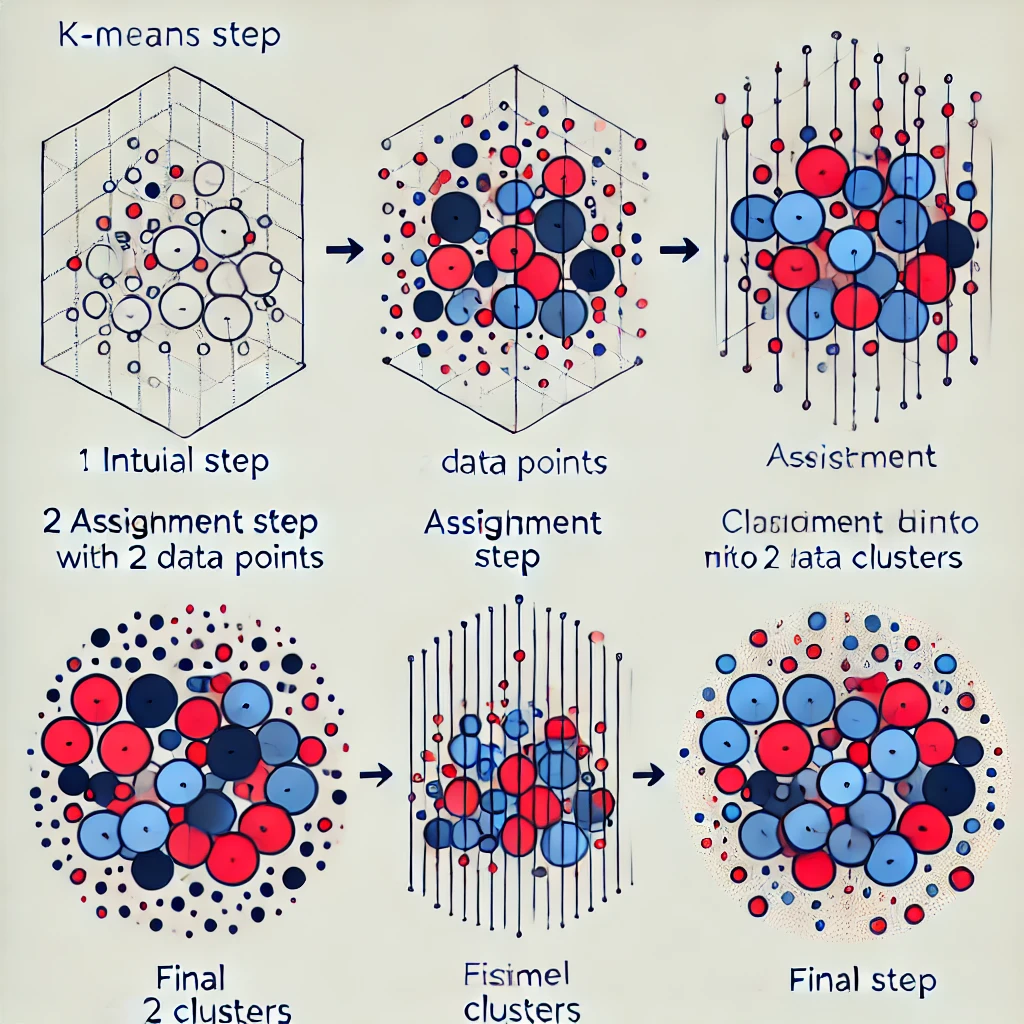

In [4]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [5]:
print(kmeans.cluster_centers_)

[[16.8 17. ]
 [70.2 74.2]]


In [6]:
print(kmeans.labels_)

[0 0 0 0 0 1 1 1 1 1]


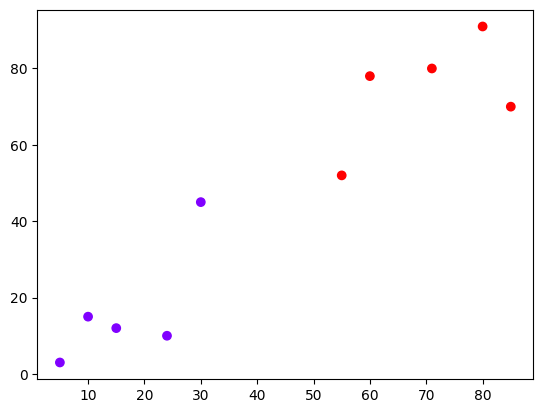

In [7]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

## K Means Clustering with 3 Clusters

* *When clustering into 3 groups, the process is the same as with 2 clusters, but with three centroids.*

In [9]:
kmeans_1 = KMeans(n_clusters = 3)
kmeans_1.fit(X)

KMeans(n_clusters=3)

In [10]:
print(kmeans_1.cluster_centers_)

[[42.5  48.5 ]
 [74.   79.75]
 [13.5  10.  ]]


In [11]:
print(kmeans_1.labels_)

[2 2 2 2 0 1 1 1 0 1]


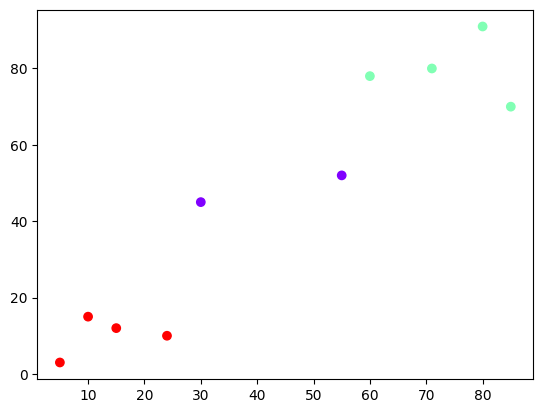

In [12]:
plt.scatter(X[:,0],X[:,1], c=kmeans_1.labels_, cmap='rainbow')

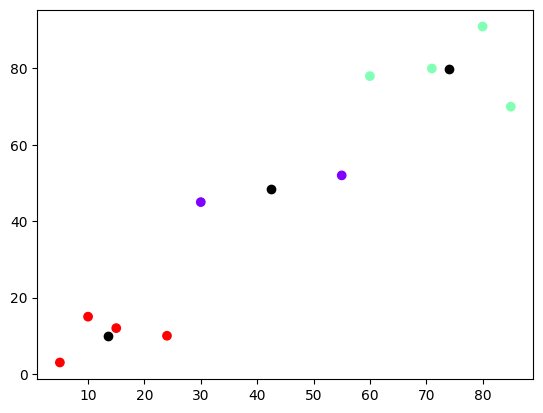

In [13]:
plt.scatter(X[:,0],X[:,1], c=kmeans_1.labels_, cmap='rainbow')
plt.scatter(kmeans_1.cluster_centers_[:,0] ,kmeans_1.cluster_centers_[:,1], color='black')

## Determining the number of cluster using Elbow Method

## The Elbow Method for Determining the Number of Clusters

The **elbow method** is a popular technique to determine the optimal number of clusters for **k-means clustering**. Here's how it works:

### Steps to Determine the Number of Clusters Using the Elbow Method:

1. **Fit the K-Means Algorithm for Various Values of \( k \):**
   - Run the k-means algorithm on the dataset for different values of \( k \) (e.g., \( k = 1, 2, 3, ..., n \)).

2. **Calculate the Within-Cluster Sum of Squares (WCSS):**
   - For each value of \( k \), calculate the **WCSS**, which measures the variance within clusters. Lower values indicate tighter clustering.

   **WCSS formula**:

   \[
   WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
   \]

   Where:
   - \( C_i \): The set of points in cluster \( i \),
   - \( \mu_i \): The centroid of cluster \( i \),
   - \( ||x - \mu_i||^2 \): The squared distance between point \( x \) and its cluster centroid.

3. **Plot \( k \) vs. WCSS:**
   - Create a line plot with \( k \) on the x-axis and WCSS on the y-axis.

4. **Identify the Elbow Point:**
   - Look for the "elbow" point in the plot. This is the value of \( k \) where the rate of decrease in WCSS significantly slows down. It represents the optimal number of clusters.


## Performing on the DataSet

## Import Required Libraries

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Load the DataSet

* *Load the data into a pandas DataFrame.*

In [9]:
dataset = pd.read_csv('Mall_Customers.csv')

In [10]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
x = dataset.iloc[:, [3, 4]].values

## Visuals

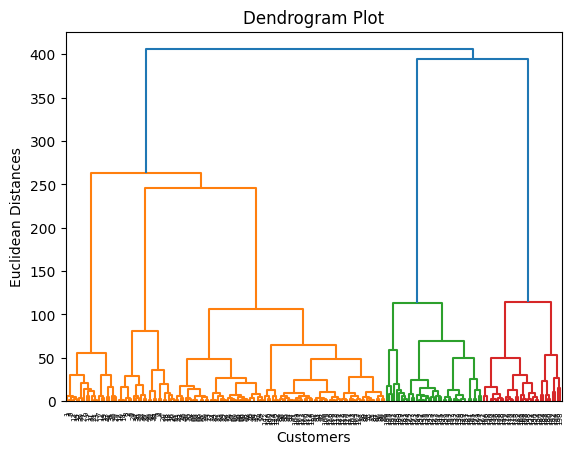

In [14]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram Plot')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

* *A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts:*

In [16]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x) 

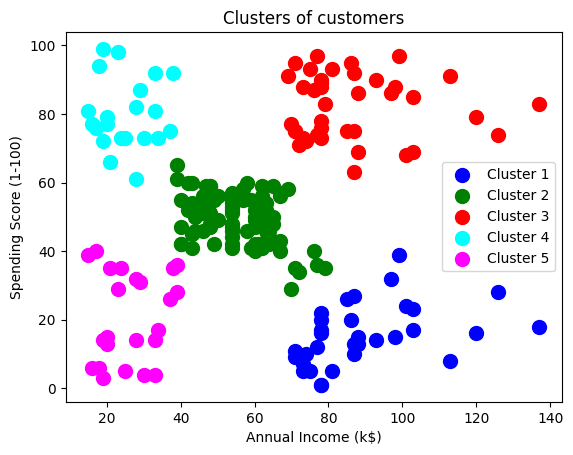

In [17]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()